In [2]:
import pandas as pd
import numpy as np
%matplotlib 
%pylab inline
#畫圖設定
font = {    'size'   : 18}
pylab.rcParams['figure.figsize'] = (20, 8) #Make figure larger.
matplotlib.rc('font', **font)

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


### 維護者
- 黃岳涵

### 資料說明
- 本程式使用的資料集是南北區各館舍用電，收集 2016.09.01 ~ 2017.08.31 的每天資料
- 館舍有104棟，每棟有365筆資料，共37960筆資料

### 在試算表上的資料前處理
- 將欄位名改成英文
- 將原資料的空格刪除（尋找取代功能）
- 刪除欄位（幾乎完全缺值）：北區總電站、南區總電站、學生七舍、學生八舍、機車Ｈ棚、資訊館(北區)、二餐水果
- 刪除欄位（缺值100~300筆）：污水廠、綜合球館
- 極大值改成0： 機車A棚
- 移除（獨立）特大欄位：空大MP動力、第一餐聽、空大ML燈力

### 資料命名
- df：原始dataframe
- df0：所有值都是是零的rows,from df
- df1: df sorted.

In [32]:
df = pd.read_csv('../data/main_南北區_365day+12month/allbd_365day_no_outliers.csv') #df for dataframe
df.head() #get a glimpse
# df.columns 

,Date,Area,Building_name,Loop,Type,Usage
0,2017/08/31,北區,體育館,籃排球場,行政,37.27
1,2017/08/30,北區,體育館,籃排球場,行政,37.14
2,2017/08/29,北區,體育館,籃排球場,行政,37.10
3,2017/08/28,北區,體育館,籃排球場,行政,39.36
4,2017/08/27,北區,體育館,籃排球場,行政,8.31


In [33]:
df.describe()
#有max e+38 第21671,21730 筆 把它設為0

,Usage
count,3.321500e+04
mean,1.617510e+04
std,3.815232e+05
min,0.000000e+00
25%,5.728500e+01
50%,4.562500e+02
75%,1.706540e+03
max,2.326859e+07


### 初始資料缺值
學生七舍       730
第二餐廳       370
學生八舍       365
機車Ｈ棚       365
南區總電站      363
北區總電站      363
資訊館(北區)    354
活動中心       222
學生十三舍      211
綜合一館       195
行政大樓       160
污水場        143
綜合球館       117
光電大樓        65
環保大樓        60
學生十舍        59
女二舍         28
學生七舍_八舍      9
圖資中心         6
交映樓          4
防災中心         4
管理二館         4
材料實驗         4
服務大樓         4
工程六館         4
學生十二舍        4

In [34]:
#看個館舍有幾個分電表，每個分電表會有365筆資料
print(df.Building_name.value_counts()/365)
# 全部正常

第二餐廳         14.0
活動中心          9.0
女二舍           7.0
綜合一館          6.0
電資大樓          4.0
學生十三舍         4.0
中正堂           3.0
體育館           3.0
圖資中心          2.0
學生十舍          2.0
機車Ａ棚          1.0
工程一館          1.0
工程三館          1.0
工程四館          1.0
機車Ｄ棚          1.0
竹軒宿舍          1.0
服務大樓          1.0
資訊館(南區)       1.0
科學一館          1.0
研究生一舍         1.0
學生十一舍_研一舍     1.0
學生七舍_八舍       1.0
研究生二舍         1.0
資訊館(北區)       1.0
交映樓           1.0
工程五館          1.0
工程六館          1.0
光電大樓          1.0
人社二館中繼        1.0
科學二館          1.0
管理二館          1.0
第一招待所         1.0
學生十一舍         1.0
人社二館          1.0
工程一館中繼        1.0
防災中心          1.0
環保大樓          1.0
工程二館          1.0
材料實驗          1.0
學生九舍          1.0
游泳館           1.0
行政大樓          1.0
人社一館          1.0
基礎大樓          1.0
學生十二舍         1.0
管理一館          1.0
土木結構          1.0
Name: Building_name, dtype: float64


In [35]:
##了解dataset: 缺值
print('有幾筆零:',df[df.Usage == 0].Usage.count())
df0 = df[df.Usage == 0]
df0.Building_name.value_counts() #看出誰缺最多
# 南區總電站 294461000
# 北區 104003400
# 北區 208006700

有幾筆零: 947


活動中心       222
學生十三舍      211
行政大樓       160
綜合一館        79
光電大樓        65
環保大樓        60
學生十舍        59
女二舍         28
機車Ａ棚        12
學生七舍_八舍      9
第二餐廳         6
圖資中心         6
學生十二舍        4
交映樓          4
防災中心         4
材料實驗         4
工程六館         4
管理二館         4
服務大樓         4
機車Ｄ棚         2
Name: Building_name, dtype: int64

In [36]:
df1 = df.sort_values('Usage')
df1.groupby('Building_name').Usage.mean().sort_values()

Building_name
第一招待所            22.519425
行政大樓            146.468493
資訊館(北區)         183.003315
機車Ａ棚            198.436658
活動中心            259.770865
學生十一舍           375.425425
體育館             425.518968
研究生一舍           507.105918
中正堂             525.424338
工程一館            550.749205
機車Ｄ棚            578.314438
學生十舍            654.753219
竹軒宿舍            666.824932
人社一館            829.652877
學生十一舍_研一舍      1060.043836
工程二館           1093.582274
學生九舍           1579.101726
科學一館           1655.063973
游泳館            2422.328356
環保大樓           2627.278274
管理一館           3690.731205
科學二館           5012.013699
第二餐廳           5966.101957
人社二館           7150.333562
電資大樓           9142.729329
防災中心           9497.241096
基礎大樓           9613.569863
光電大樓          10840.329671
綜合一館          11475.203269
服務大樓          13168.334274
材料實驗          13864.596877
工程一館中繼        15043.616438
工程六館          18162.165534
資訊館(南區)       19049.616438
學生十二舍         31295.300000
女二舍           32353.045178
管理二館          

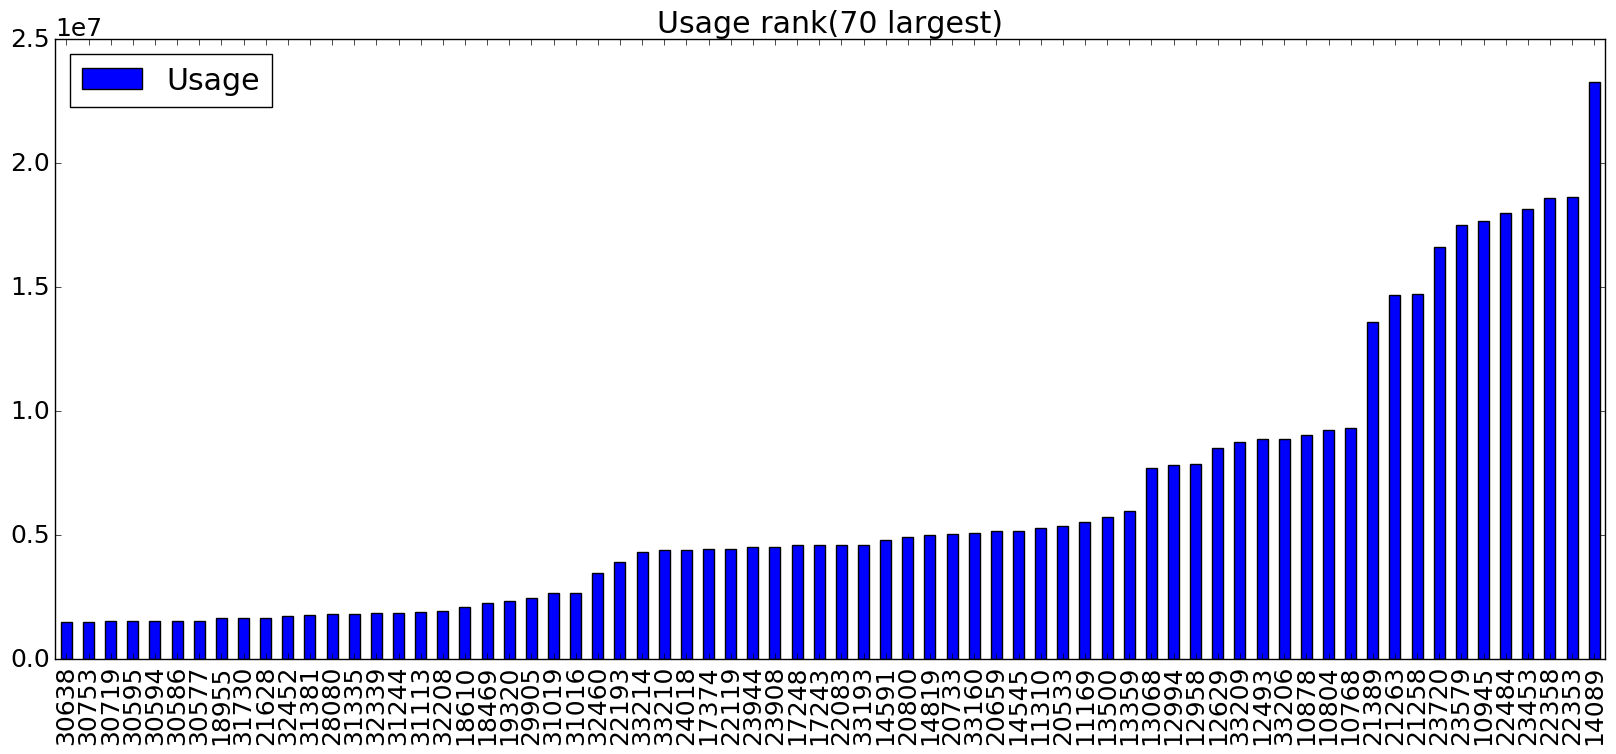

In [38]:
df1[-70:].plot.bar(title='Usage rank(70 largest)')
savefig('allbd_365days_70_largest')

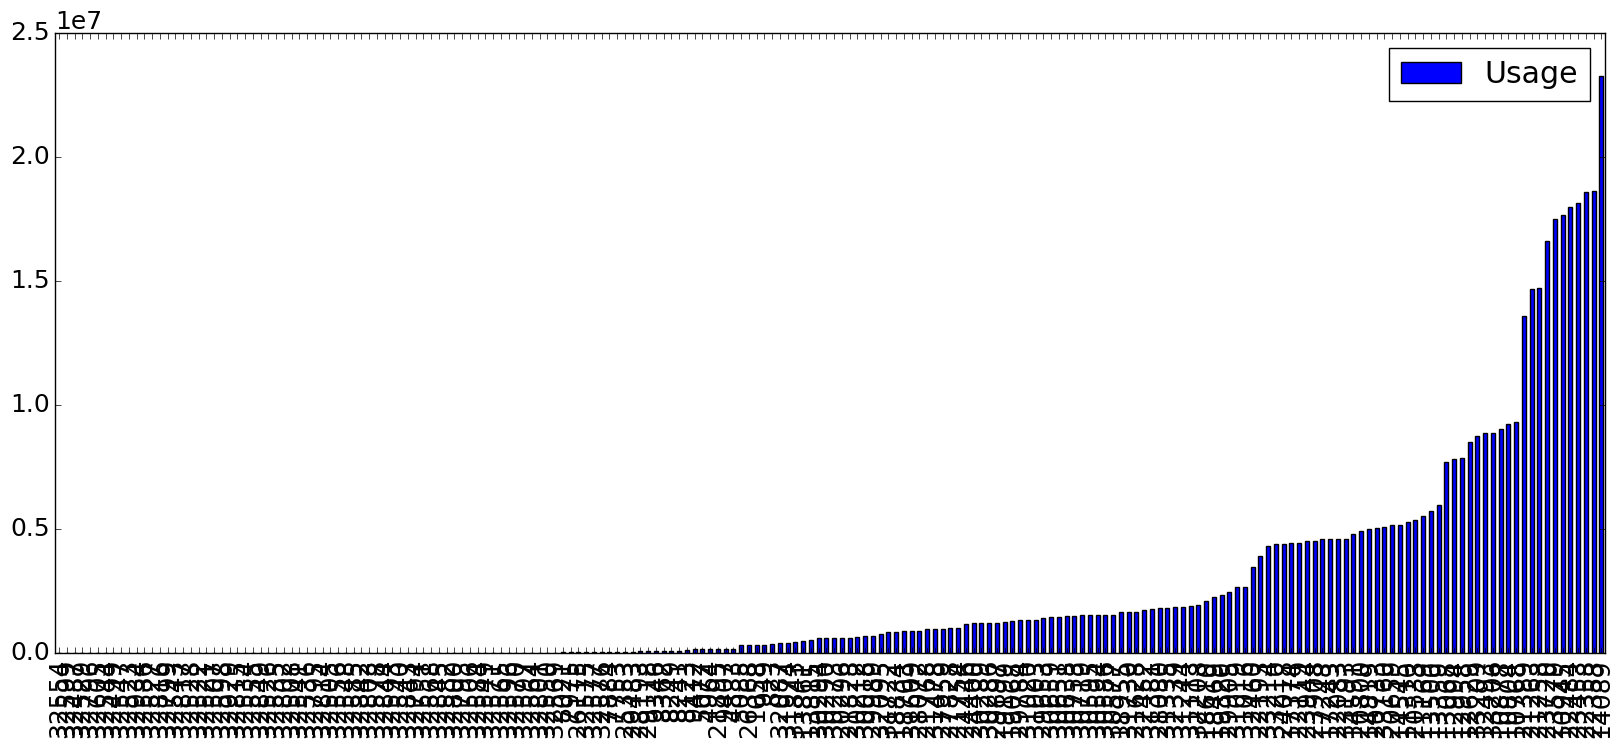

In [42]:
df1[-200:].plot.bar()

In [43]:
df2 = df1[df1.Usage>6000000]
df2

,Date,Area,Building_name,Loop,Type,Usage
13068,2016/11/11,南區,綜合一館,主迴路,教學,7689236.0
12994,2017/01/24,南區,綜合一館,主迴路,教學,7812288.0
12958,2017/03/01,南區,綜合一館,主迴路,教學,7858004.0
12629,2017/01/24,南區,學生七舍_八舍,主迴路,宿舍,8508687.0
33209,2016/09/06,北區,人社二館中繼,NaN,電站,8765576.0
12493,2017/06/09,南區,學生七舍_八舍,主迴路,宿舍,8857261.0
33206,2016/09/09,北區,人社二館中繼,NaN,電站,8862454.0
10878,2016/11/11,南區,學生十三舍,主迴路,宿舍,9017926.0
10804,2017/01/24,南區,學生十三舍,主迴路,宿舍,9217125.0
10768,2017/03/01,南區,學生十三舍,主迴路,宿舍,9308904.0


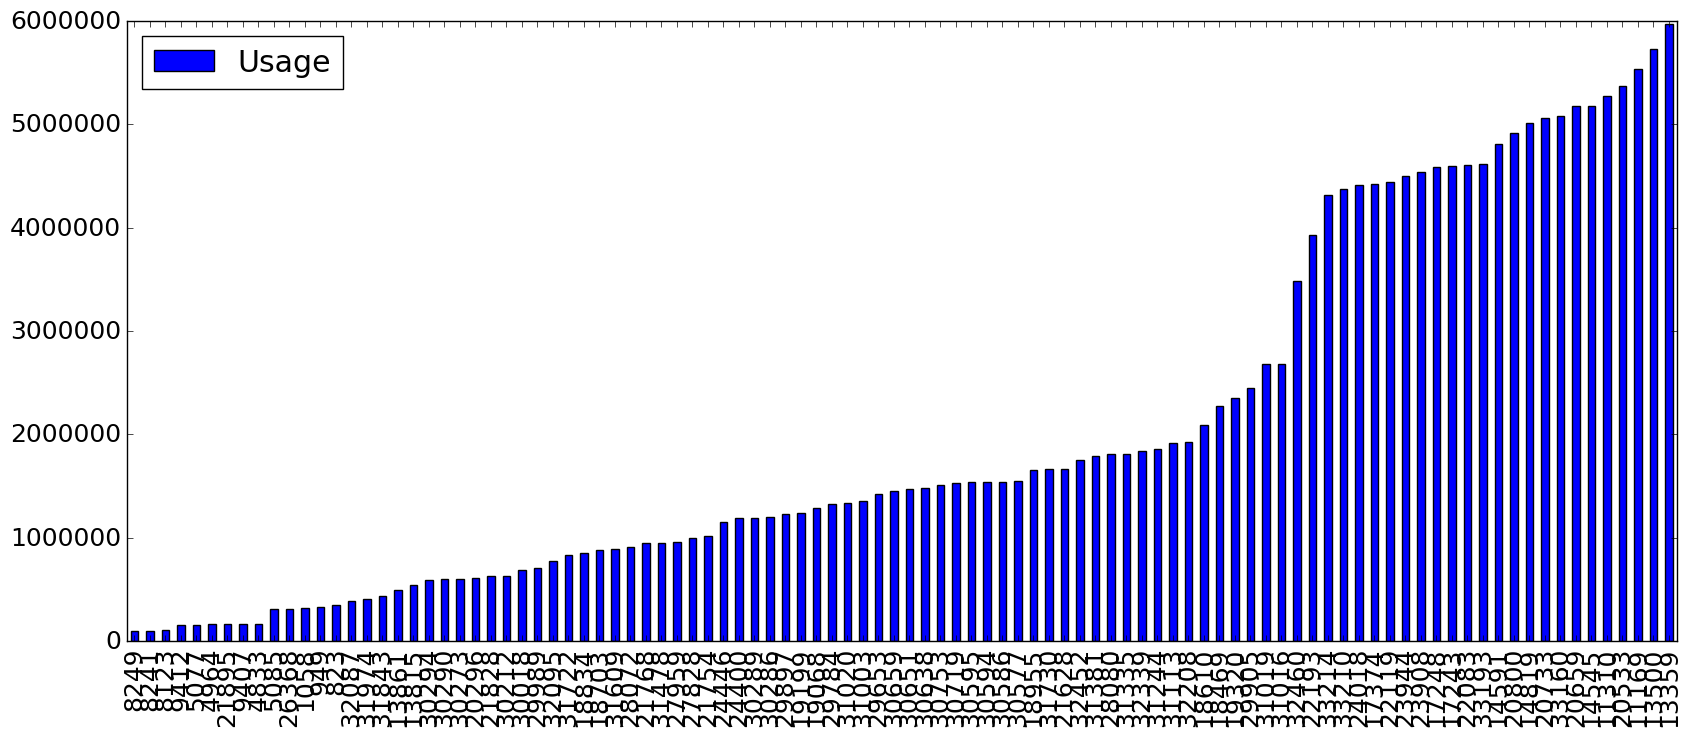

In [52]:
df3 = df1[df1.Usage<6000000]
df4 = df3[df3.Usage<3000000]
df5 = df3[df3.Usage>3000000]
df3[-100:].plot.bar()

In [55]:
df

第二餐廳         425.833333
活動中心         273.750000
女二舍          212.583333
綜合一館         182.250000
電資大樓         121.500000
學生十三舍        121.333333
體育館           91.250000
中正堂           91.250000
學生十舍          60.833333
圖資中心          60.750000
機車Ａ棚          30.416667
科學一館          30.416667
工程一館          30.416667
服務大樓          30.416667
竹軒宿舍          30.416667
機車Ｄ棚          30.416667
工程六館          30.416667
光電大樓          30.416667
學生十一舍_研一舍     30.416667
科學二館          30.416667
管理一館          30.416667
資訊館(北區)       30.416667
基礎大樓          30.416667
人社一館          30.416667
行政大樓          30.416667
游泳館           30.416667
學生九舍          30.416667
材料實驗          30.416667
工程二館          30.416667
環保大樓          30.416667
防災中心          30.416667
工程一館中繼        30.416667
人社二館          30.416667
學生十一舍         30.416667
第一招待所         30.416667
研究生一舍         30.416667
資訊館(南區)       30.333333
學生七舍_八舍       30.250000
學生十二舍         30.250000
管理二館          30.250000
工程五館          30.166667
土木結構          30

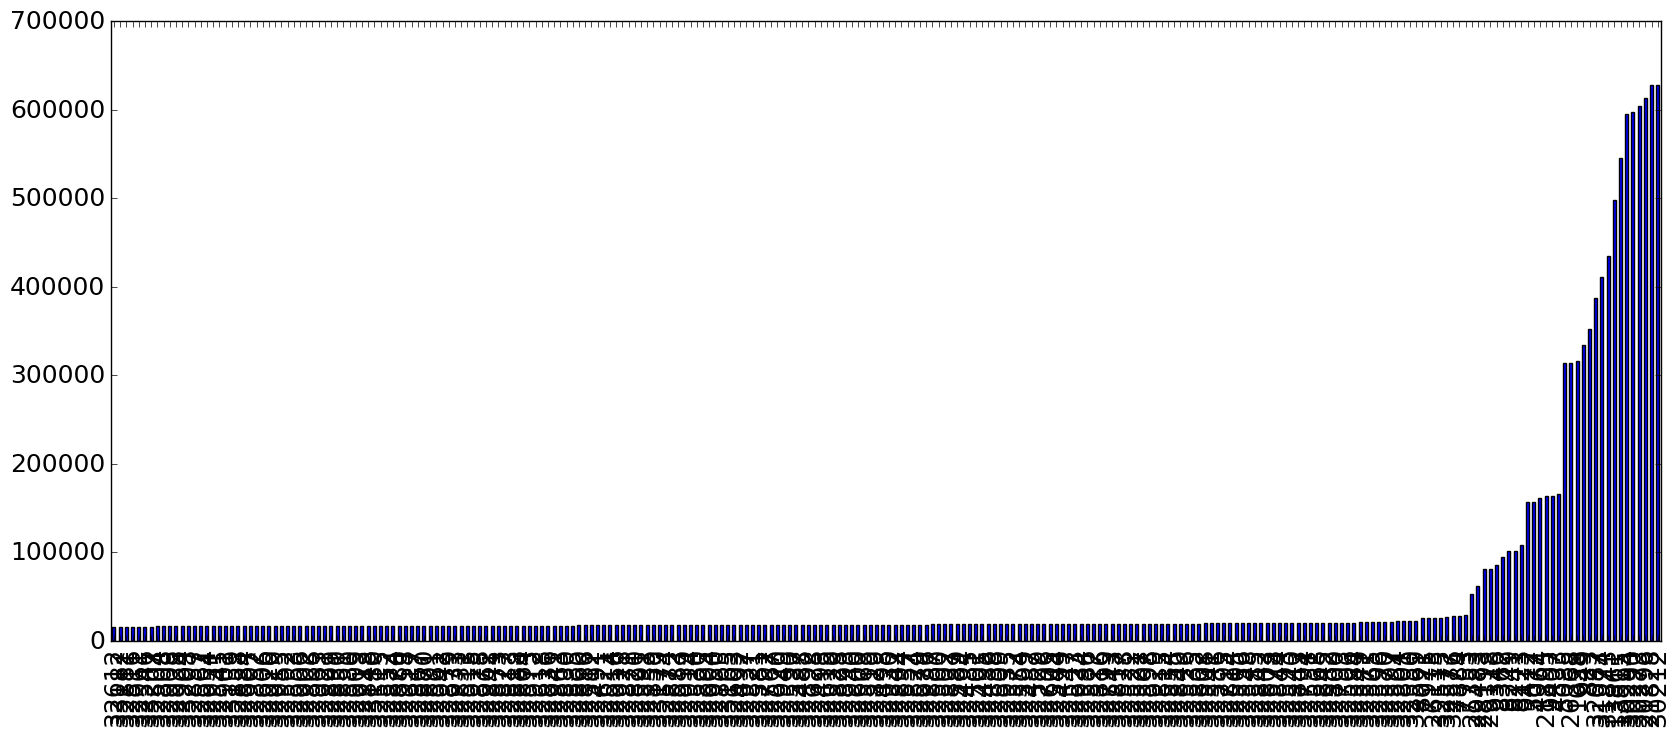

In [60]:
df4[-300:-50].Usage.plot.bar()

In [63]:
df6 = df4[df4.Usage<300000]
df6[-100:].plotb

,Date,Area,Building_name,Loop,Type,Usage
32502,2017/08/14,北區,工程一館中繼,NaN,電站,18800.00
32837,2016/09/13,北區,工程一館中繼,NaN,電站,18816.00
32589,2017/05/19,北區,工程一館中繼,NaN,電站,18880.00
32494,2017/08/22,北區,工程一館中繼,NaN,電站,18884.00
32485,2017/08/31,北區,工程一館中繼,NaN,電站,18932.00
32501,2017/08/15,北區,工程一館中繼,NaN,電站,18940.00
32495,2017/08/21,北區,工程一館中繼,NaN,電站,18944.00
32486,2017/08/30,北區,工程一館中繼,NaN,電站,18956.00
32838,2016/09/12,北區,工程一館中繼,NaN,電站,18996.00
32509,2017/08/07,北區,工程一館中繼,NaN,電站,19068.00


In [41]:
#df1[-40:].plot.bar()
df1[-30:-10]

,Date,Area,Building_name,Loop,Type,Usage
20733,2016/11/11,南區,交映樓,主迴路,教學,5057174.0
33160,2016/10/25,北區,人社二館中繼,NaN,電站,5077372.0
20659,2017/01/24,南區,交映樓,主迴路,教學,5176363.0
14545,2016/10/25,北區,電資大樓,主迴路,教學,5178096.0
11310,2016/09/05,南區,學生十二舍,主迴路,宿舍,5277394.0
20533,2017/05/30,南區,交映樓,主迴路,教學,5369824.0
11169,2017/01/24,南區,學生十二舍,主迴路,宿舍,5537841.0
13500,2016/09/05,南區,管理二館,主迴路,教學,5727037.0
13359,2017/01/24,南區,管理二館,主迴路,教學,5967521.0
13068,2016/11/11,南區,綜合一館,主迴路,教學,7689236.0


,Date,Area,Building_name,Loop,Type,Usage
33601,2017/08/10,北區,工程一館中繼,NaN,電站,2.088800e+04
33679,2017/05/24,北區,工程一館中繼,NaN,電站,2.090000e+04
33644,2017/06/28,北區,工程一館中繼,NaN,電站,2.097600e+04
33666,2017/06/06,北區,工程一館中繼,NaN,電站,2.108800e+04
33660,2017/06/12,北區,工程一館中繼,NaN,電站,2.117600e+04
33691,2017/05/12,北區,工程一館中繼,NaN,電站,2.129200e+04
33665,2017/06/07,北區,工程一館中繼,NaN,電站,2.135200e+04
33692,2017/05/11,北區,工程一館中繼,NaN,電站,2.201600e+04
33659,2017/06/13,北區,工程一館中繼,NaN,電站,2.218400e+04
33896,2016/10/19,北區,工程一館中繼,NaN,電站,2.224400e+04


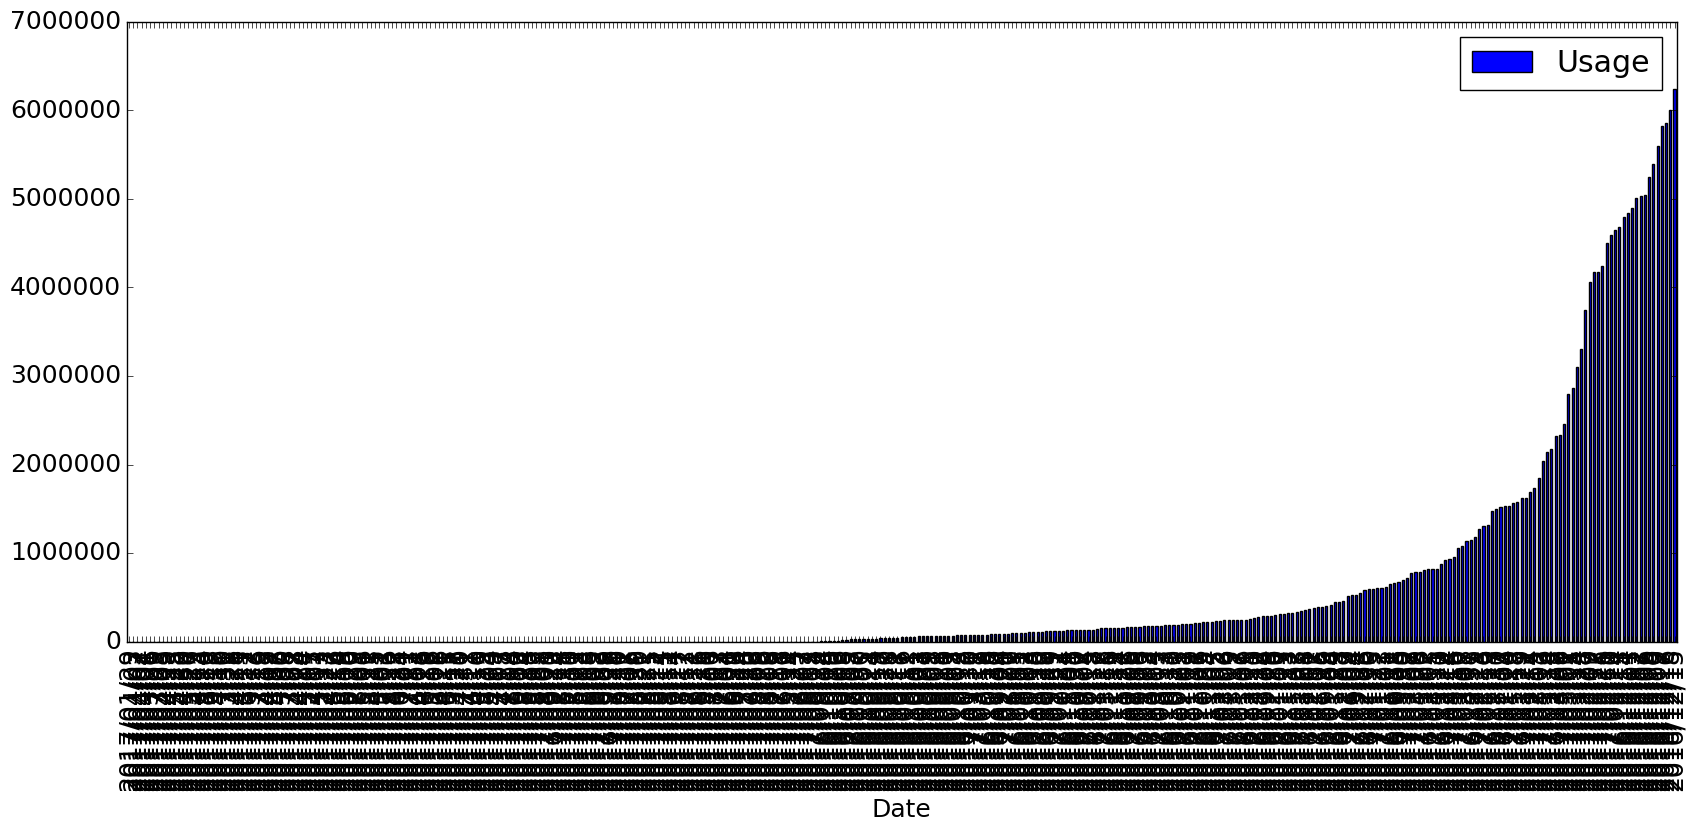

In [17]:
# 每天學校平均用電
# df1 = df[df.Loop!='第一餐聽'] #第一餐廳離群值高
# df1 = df1[df1.Loop!='空大ML燈力'] #空大ML燈力離群值高
df1.groupby('Date').mean().sort_values('Usage').plot.bar()
df1.Usage.nlargest(n=150) #found min is 63168.61
df1[df1.Usage>20840.00]

In [18]:
df1[df1.Usage>63168.61].Building_name.value_counts() 

綜合一館       148
活動中心       129
女二舍         27
第二餐廳        23
學生十三舍        8
人社二館中繼       6
圖資中心         5
工程六館         5
交映樓          4
土木結構         3
材料實驗         3
工程五館         3
工程四館         3
環保大樓         3
防災中心         3
研究生二舍        3
工程三館         3
服務大樓         2
人社二館         2
管理二館         2
學生七舍_八舍      2
學生十二舍        2
管理一館         2
電資大樓         2
光電大樓         1
資訊館(南區)      1
中正堂          1
Name: Building_name, dtype: int64

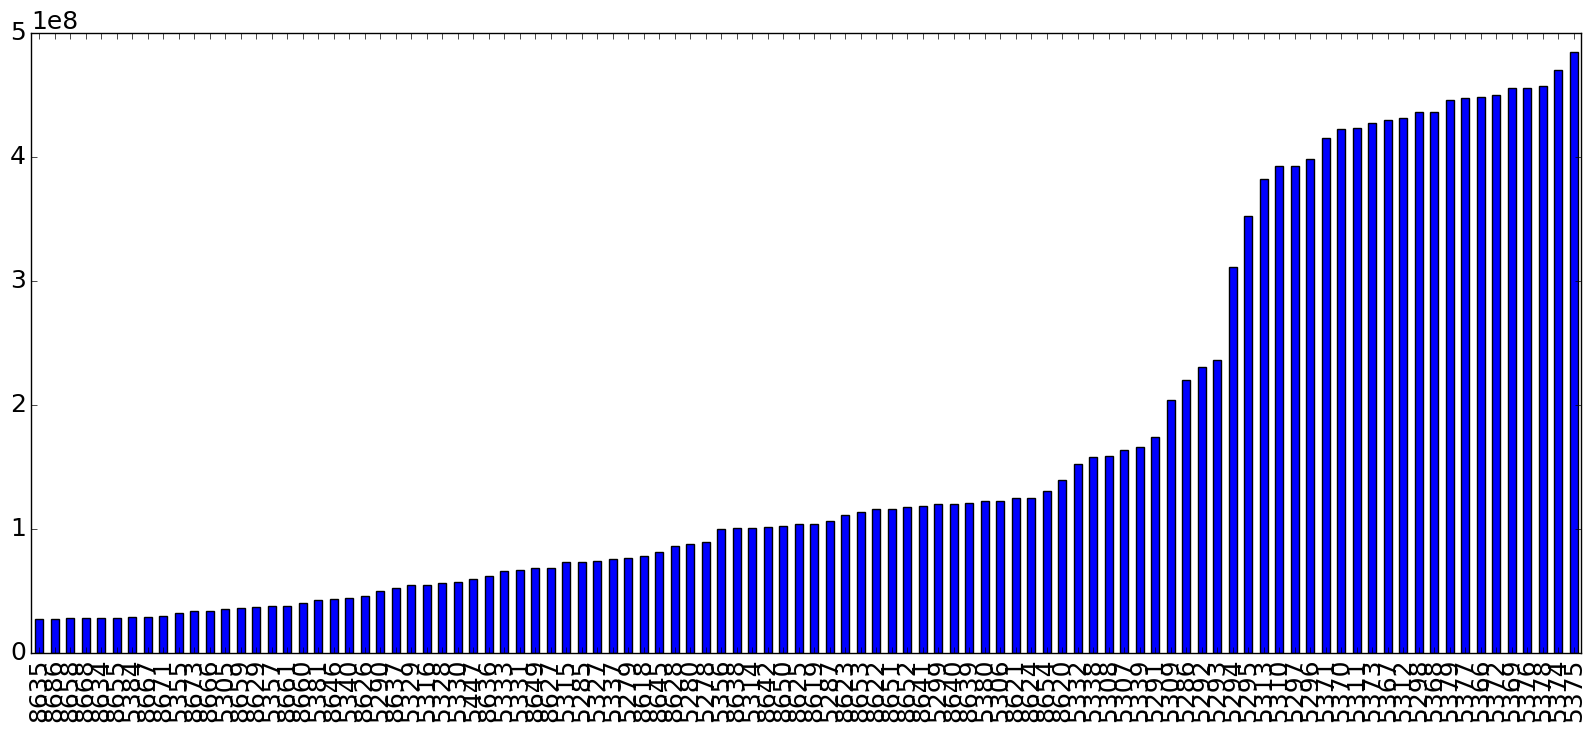

In [13]:
#自動切除離群值
# df1.groupby(['Building_name','Loop'])
df1[-100:].Usage.plot.bar()

# df[np.abs(df.Data-df.Data.mean())<=(3*df.Data.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
# df[~(np.abs(df.Data-df.Data.mean())>(3*df.Data.std()))] #or if you prefer the other way around

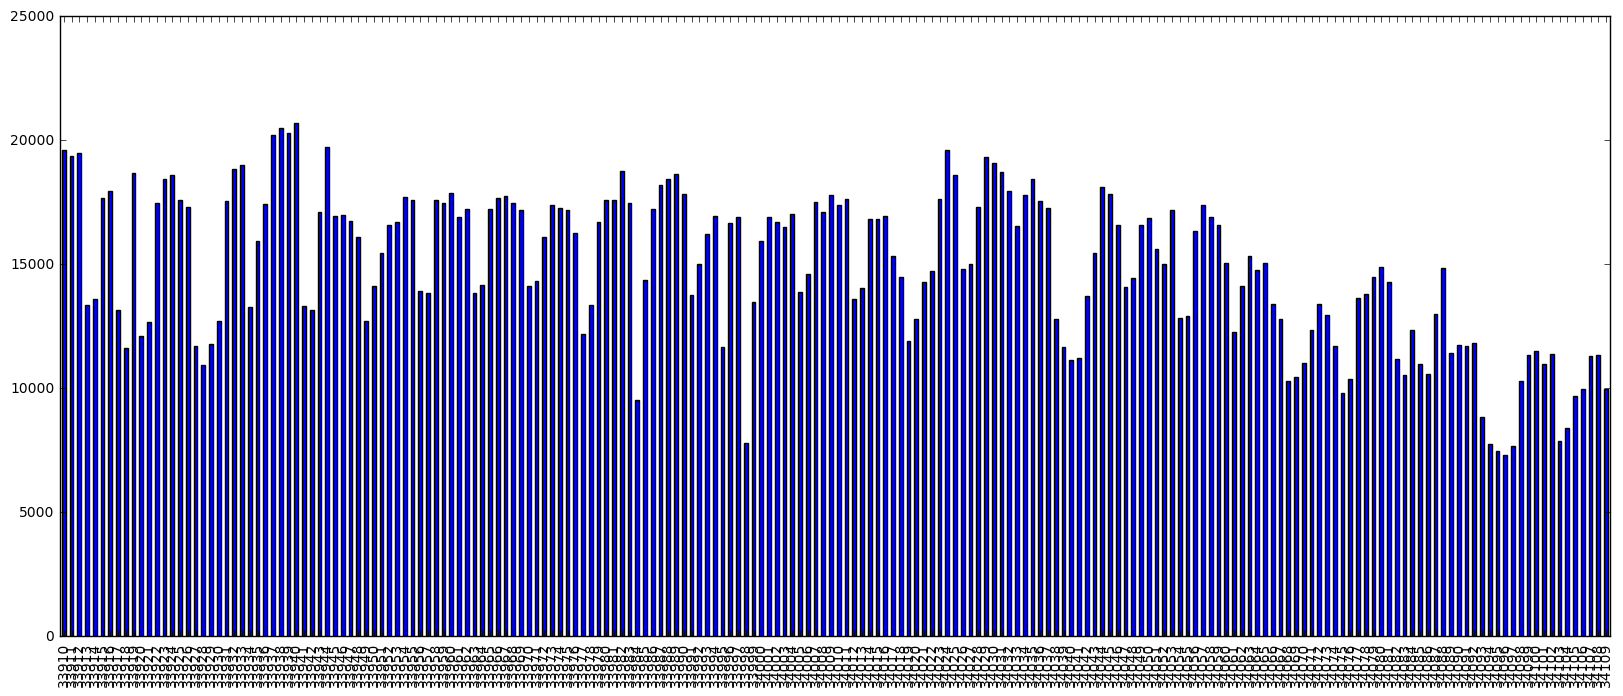

In [135]:
df1[-400:-200].Usage.plot.bar()


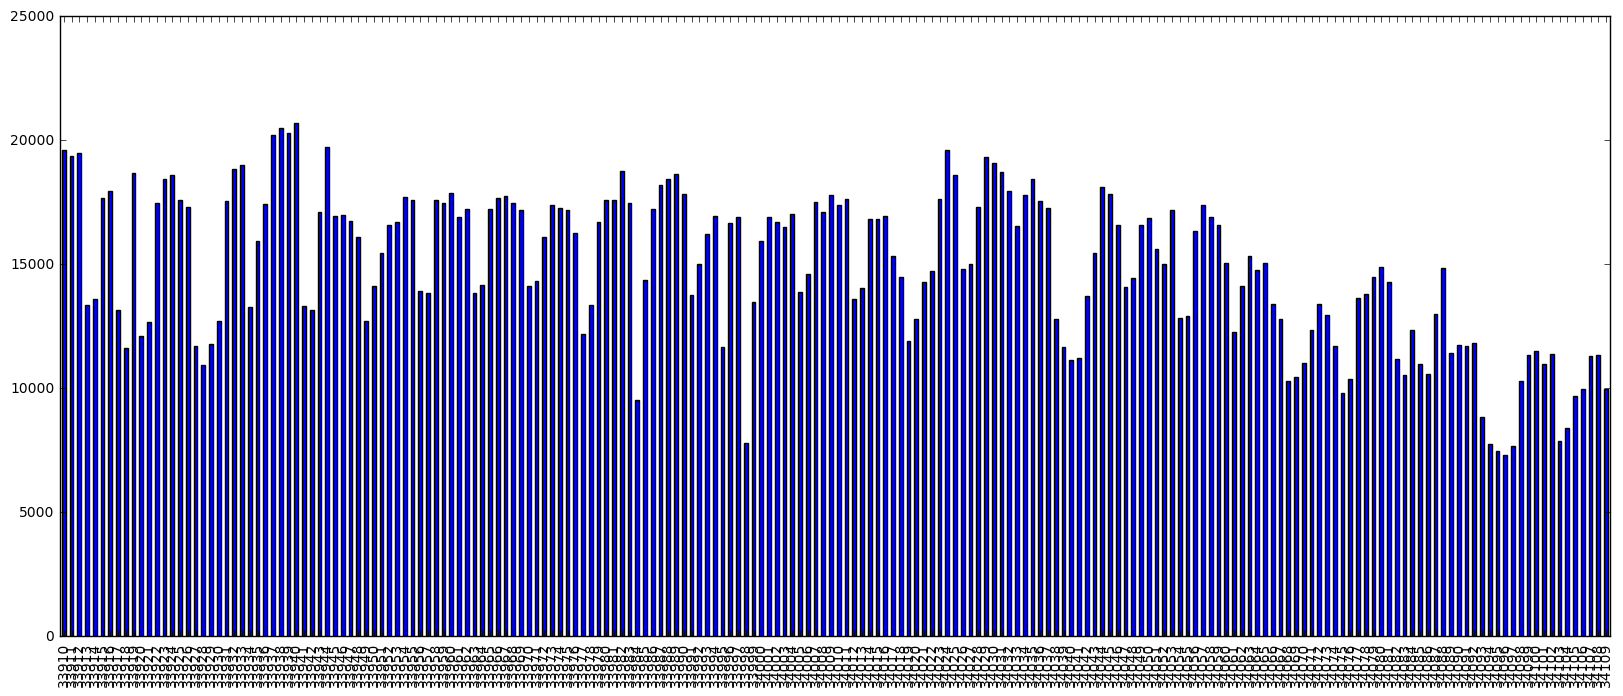

In [136]:
df1[-400:-200].Usage.plot.bar()


In [137]:
#df1[df1.Usage<20000].Usage.plot.bar()

In [138]:
df1[df1.Usage<20000].tail()

,Date,Area,Building_name,Loop,Type,Usage
34302,2016/09/08,北區,人社二館中繼,NaN,電站,16427.5
34303,2016/09/07,北區,人社二館中繼,NaN,電站,16563.0
34306,2016/09/04,北區,人社二館中繼,NaN,電站,12298.5
34307,2016/09/03,北區,人社二館中繼,NaN,電站,11785.5
34308,2016/09/02,北區,人社二館中繼,NaN,電站,14218.0


In [139]:
print (df1[-100:].describe())
print (df1[:-100].describe())


              Usage
count  1.000000e+02
mean   3.724763e+05
std    1.512306e+06
min    9.501000e+03
25%    1.141012e+04
50%    1.312925e+04
75%    1.501462e+04
max    8.862454e+06
              Usage
count  3.348000e+04
mean   1.494016e+04
std    3.704955e+05
min    0.000000e+00
25%    5.728750e+01
50%    4.408600e+02
75%    1.647727e+03
max    2.326859e+07


,Usage
Building_name,
第一招待所,22.519425
行政大樓,146.468493
資訊館(北區),183.003315
機車Ａ棚,198.436658
活動中心,259.770865
學生十一舍,375.425425
體育館,425.518968
研究生一舍,507.105918
中正堂,525.424338


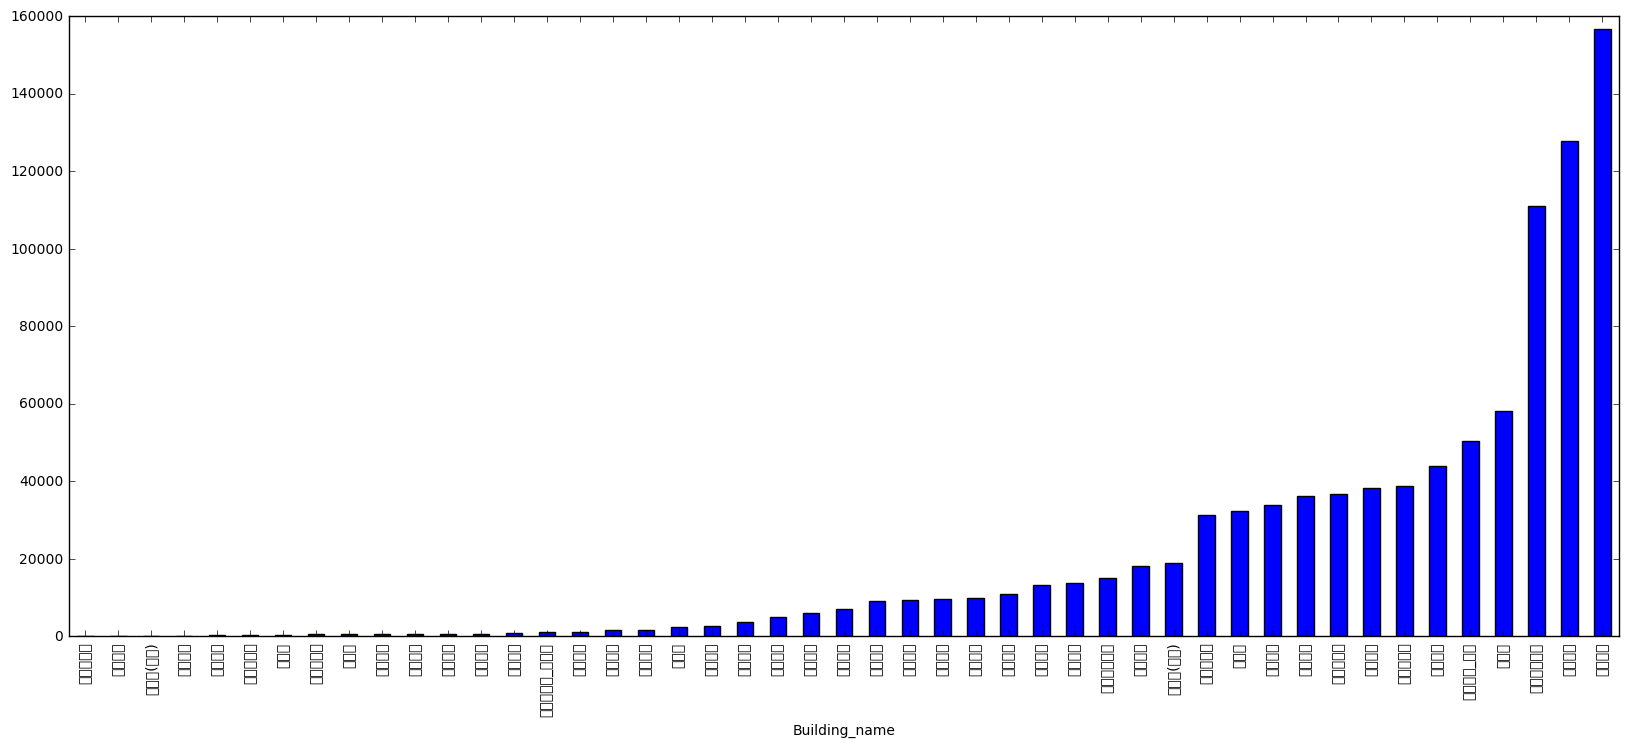

In [140]:

df1.groupby('Building_name').mean().sort_values('Usage')['Usage'].plot.bar()
df1.groupby('Building_name').mean().sort_values('Usage')

In [ ]:
df1[df1.bd_name == 'SB'].sort_values('date')['Usage'].plot.bar(color='green')
df1[df1.bd_name == 'SA'].sort_values('date')['Usage'].plot.bar(color='yellow')


In [ ]:
dfsmall = df3 [df3.bd_name != 'DinningHall2                ']
dfsmallmean = dfsmall.groupby('bd_name').mean()
dfsmallmean.Usage.plot.bar()
df3_1 = df3.groupby('bd_name').mean()
#.Usage.plot.bar()

In [ ]:
df3_1.sort_values('Usage')['Usage'].plot.bar()
savefig('sort.png')

In [ ]:
#df3.groupby(['date','bd_name']).count()['Usage'].unstack().plot()
df3big = df3[df3.Usage > 100000]
df3big.groupby('bd_name').mean().plot.bar()

In [ ]:
#df3.groupby('Usage').Usage.plot.bar(subplots=True)
#print (df3.groupby('bd_name')['Usage'].plot(subplots=True))
#df3.groupby('date').plot.bar()


In [ ]:
df3.head()

In [ ]:
df3.Usage.mean()

In [ ]:
df3.groupby('bd_name').Usage.mean().plot.bar()

In [ ]:
name ="""1. Management Building 1 管理一館
2. HA Building 2 人社二館
3. Administration Building 行政大樓
4. Chung Cheng Auditorium 中正堂
5. HA Building 1 人社一館
6. Engineering Building 1 工程一館
7. Engineering Building 2 工程二館
8. Science Building 1 科學一館
9. Information Building 資訊館
10. Engineering Building 3 工程三館
11. Dinning Hall 1 第一餐廳
12. Dinning Hall 2 第二餐廳
13. Badminton Building 羽球館
14. Gymnasium 體育館
15. Swimming Pool 游泳池
16. Field 田徑場
17. Student Dormitory 7 學生七舍
18. Student Dormitory 8 學生八舍
19. Chu-Hsuan Female 竹軒女舍
20. Student Dormitory 9 學生九舍
21. Student Dormitory 10 學生十舍
22. Graduate Student Dormitory 1 研一舍
23. Student Dormitory 11 學生十一舍
24. Engineering Building 4 工程四館
25. Management Building 2 管理二館
26. National Nano Device Lab 毫微米元件實驗室
27. Student Dormitory 12 學生十二舍
28. Science Building 2 科學二館
29. Student Activity Center 學生活動中心
30. Engineering Building 5 工程五館
31. Assembly Building 1 綜合一館
32. Student Dormitory 13 學生十三舍
33. Graduate Student Dormitory 2 研二舍
34. Library and Information Center 浩然圖書資訊中心
35. Microelectronics & Information 電子資訊中心
36. Civil Engineering Lab 土木實驗結構室
37. Female Student Dormitory 2 女二舍
38. Materials & Mechanical Engineering Lab材料實驗室
"""

In [ ]:
name_list = name.splitlines()
for i in range(len(name_list)):
    name_list[i] = name_list[i].split()

name_list


bd_name_list = df3.bd_name.unique()
for i in range(len(name_list)):
    name_list[i] = [name_list[i][-1],''.join(name_list[i][1:-1])]


In [ ]:
# Clear white space in string 
for i in range(len(bd_name_list)):
    bd_name_list[i] = bd_name_list[i].replace(" ", "")
bd_name_list 

In [ ]:
name_list_ch = []
for i in range(len(name_list)): 
    name_list_ch.append(name_list[i][0])
print(name_list_ch)
print(bd_name_list)

In [ ]:
print (set(bd_name_list)&set(name_list_ch)) 
print (set(bd_name_list)-set(name_list_ch)) 
print (set(name_list_ch)-set(bd_name_list)) 


In [ ]:
for item in name_list:
    print (item[1:-1])

In [ ]:
df_hr = newdf.Date_Time.str[-5:-3]
df_min = newdf.Date_Time.str[-2:]
# print (df_hr.head(),df_min.head())
newdf.loc[:,'hr'] = pd.Series(df_hr)
newdf.loc[:,'min'] = pd.Series(df_min)
newdf.Date_Time = newdf.Date_Time.str[:-6]
newdf.head()

In [ ]:
#科三每小時平均用電量, 範圍 10.01(Sun) - 10.14(Sat.)
dfnew_gpby = newdf.groupby(['hr'])
dfnew_gpby.mean().plot.bar()
matplotlib.pyplot.title('Hourly average electricity usage (Takes 14 day, unit: degree)')

In [ ]:
#科三每15分鐘用電量 
#沒什麼意義
dfnew_gpby = newdf.groupby(['min'])
dfnew_gpby.mean().plot.bar()
# matplotlib.pyplot.title('Minute average electricity usage (Takes 14 day, unit: degree)')

In [ ]:
dfnew_byDay = newdf.groupby(['Date_Time'])
dfnew_byDay.plot.bar(stacked=True)

In [ ]:
df_te.plot.bar()
matplotlib.pyplot.title('Electricity usage in hours (Takes 14 day, unit: degree)')

In [ ]:
plt.bar( 
        #using df['pre_score'] data,
        dfnew_byDay.Usage, 
        # of width
#         width, 
        # with alpha 0.5
#         alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in first_name
#         label=dfnew_byDay['Date_Time'][0]
) 

In [ ]:
?plt.bar

In [ ]:
''